In [1]:
import numpy as np
import matplotlib.pyplot as plt

# El modelo más sencillo para la propagación de una enfermedad
$$\frac{dS}{dt} = -\beta SI$$
$$\frac{dI}{dt} = \beta SI - \gamma I$$
1. We may considera population that is supposed to be constant.
2. The susceptibles (S) who can catch the disease.
3. The infective (I) who have the disease and are able to transmit it.
4. $\beta$ (rate of infected) and $\gamma$ (recovered rate) are given constants reflecting the characteristics of the epidemic.

In [2]:
# Definimos la discretizacion para el tiempo
Tmin, Tmax, Npoints = 0, 14, 1000
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax - Tmin)/float(Npoints - 1)

S0 = 1000
I0 = 1

In [3]:
# Definimos el array para S y I 

S = np.zeros(Npoints)
I = np.zeros(Npoints)

S[0] = S0
I[0] = I0

In [4]:
r=0.00218
a=0.44

for i in range(1,Npoints):
    S[i] = S[i-1] - deltat*r*S[i-1]*I[i-1]
    I[i] = I[i-1] + deltat*( r*S[i-1]*I[i-1] - a*I[i-1] )

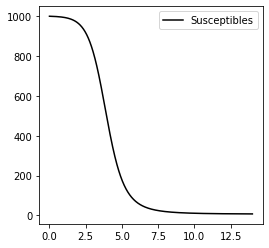

In [5]:
plt.figure(figsize=(4,4))
plt.plot(t,S, c='k',label='Susceptibles')
plt.legend(loc=0)
plt.show()

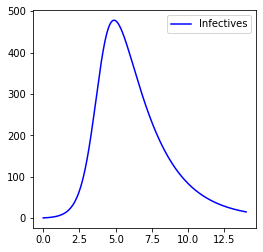

In [6]:
plt.figure(figsize=(4,4))
plt.plot(t,I, c='b',label='Infectives')
plt.legend(loc=0)
plt.show()

# Involucrando el flujo interno de personas
$$\frac{dS_k}{dt} = -\beta_k \frac{S_k I_k}{N_k}$$
$$\frac{dI_k}{dt} = \beta_k \frac{S_k I_k}{N_k} - \gamma I_k$$
$$\frac{dR_k}{dt} = \gamma I_k $$
### The origin-destination matrix 
$$ \mathbf{T = I + \alpha(F^{out} + F^{in}}) $$$$ S_{k}(t) = \sum_{j} (I_{kj}+\alpha(F^{out}_{kj}+F^{in}_{kj}) )  S_{j}(t) $$


In [7]:
g = 1.0/10.0
alpha = 0.000001

In [8]:
# Definir la matriz de trasferencia
I = np.array([ [1.,0,0],[0,1.,0],[0,0,1.] ])
Fout = np.array( [ [3./5.,0,0],[0,12./20.,0],[0,0,2./3.] ])
Fin = np.array( [ [0.,5./20.,8./30.],[1./5.,0.,12./30.],[2./5.,7./20.,0.] ])

T = I + alpha*(-Fout + Fin)
print(T)

[[9.99999400e-01 2.50000000e-07 2.66666667e-07]
 [2.00000000e-07 9.99999400e-01 4.00000000e-07]
 [4.00000000e-07 3.50000000e-07 9.99999333e-01]]


In [9]:
Ptot = np.array([50, 20, 30])
Ia = np. array([0,0,1/100])
Sa = Ptot - Ia
Ra = g*np.array([2.5, 2.5, 2.5])# Numero de reproduccion // probabilidad de contagio en cada region

In [10]:
Sp = np.array([Sa])
Ip = np.array([Ia])
Rp = np.array([Ra])

St = np.array([np.sum(Sa)])
It = np.array([np.sum(Ia)])
Rt = np.array([np.sum(Ra)])

ttotal = np.array([0.])

In [11]:
TMax = 100.0
dt = 0.01
t = 0.0
while (t<=TMax):
    Sa = np.matmul(T,Sa)
    Ia = np.matmul(T,Ia)
    Ra = np.matmul(T,Ra)
    Ptot = Sa+Ia+Ra
    
    Sa += -Ra*Sa*Ia*dt/(Ptot)
    Ia += Ra*Sa*Ia*dt/(Ptot) - Ia*dt*g
    Ra += Ia*dt*g
    
    t += dt
    
    #Evolucion total
    St = np.concatenate((St, [np.sum(Sa)]),axis=0) 
    It = np.concatenate((It, [np.sum(Ia)]),axis=0) 
    Rt = np.concatenate((Rt, [np.sum(Ra)]),axis=0) 
    #Evolucion por region
    Sp = np.concatenate((Sp, [Sa]),axis=0)
    Ip = np.concatenate((Ip, [Ia]),axis=0)
    Rp = np.concatenate((Rp, [Ra]),axis=0)
    
    ttotal = np.concatenate((ttotal, [t]), axis=0)

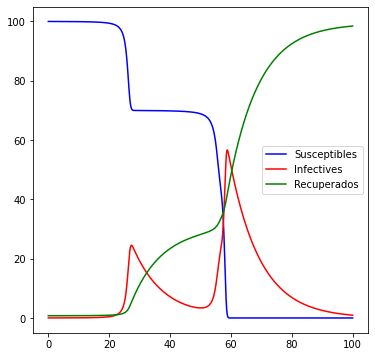

In [13]:
plt.figure(figsize=(6,6))
plt.plot(ttotal,St, c='b',label='Susceptibles')
plt.plot(ttotal,It, c='r',label='Infectives')
plt.plot(ttotal,Rt, c='g',label='Recuperados')
plt.legend(loc=0)
#plt.xlim(40,50)
plt.savefig('covid.png')
plt.show()